## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "../Resources/Mouse_metadata.csv"
study_results_path = "../Resources/Study_results.csv" 

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_study=pd.merge(mouse_metadata,study_results,on="Mouse ID",how="inner")

# Display the data table for preview

mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_of_mice=mouse_study["Mouse ID"].count()
print("number of mice:",number_of_mice)


number of mice: 1893


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_study[mouse_study.duplicated(["Mouse ID","Timepoint"])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

mouse_study.groupby(["Mouse ID"]).sum()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
a203,200,230,225,563.127077,11
a251,210,250,225,552.370946,8
a262,170,290,225,586.116306,23
a275,200,280,225,527.709651,12
a366,112,203,105,382.479341,1
a401,80,250,225,540.007063,21
a411,30,220,225,407.013854,8
a444,100,250,225,430.600524,0
a457,33,90,15,142.246310,0


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study=mouse_study.drop_duplicates(subset=["Mouse ID","Timepoint"], keep='first')
clean_mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
number_mice_clean_Data=clean_mouse_study["Mouse ID"].count()
print("the number of mice in the clean DataFrame :",number_mice_clean_Data)

the number of mice in the clean DataFrame : 1888


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
s1=clean_mouse_study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean().reset_index()
s2=clean_mouse_study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median().reset_index()
s3=clean_mouse_study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var().reset_index()
s4=clean_mouse_study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std().reset_index()
s5=clean_mouse_study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem().reset_index()

summsep=pd.DataFrame({"Drug Regimen":s1["Drug Regimen"], "mean tumor":s1["Tumor Volume (mm3)"],"median Tumor":s2["Tumor Volume (mm3)"],
   "var Tumor":s3["Tumor Volume (mm3)"],"std Tumor":s4["Tumor Volume (mm3)"],"sem Tumor":s5["Tumor Volume (mm3)"]})
summsep


,Drug Regimen,mean tumor,median Tumor,var Tumor,std Tumor,sem Tumor
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_statistics =clean_mouse_study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg({'mean','median','var','std','sem'}).reset_index()

summary_statistics


,Drug Regimen,sem,std,mean,median,var
0,Capomulin,0.329346,4.994774,40.675741,41.557809,24.947764
1,Ceftamin,0.469821,6.268188,52.591172,51.776157,39.290177
2,Infubinol,0.492236,6.567243,52.884795,51.820584,43.128684
3,Ketapril,0.603860,8.279709,55.235638,53.698743,68.553577
4,Naftisol,0.596466,8.134708,54.331565,52.509285,66.173479
5,Placebo,0.581331,7.821003,54.033581,52.288934,61.168083
6,Propriva,0.525862,6.568014,52.393463,50.909965,43.138803
7,Ramicane,0.320955,4.846308,40.216745,40.673236,23.486704
8,Stelasyn,0.573111,7.710419,54.233149,52.431737,59.450562
9,Zoniferol,0.516398,6.966589,53.236507,51.818479,48.533355


## Bar and Pie Charts

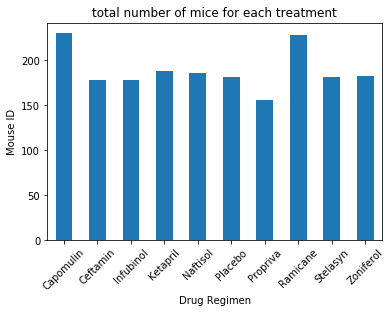

In [6]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
numbermice=clean_mouse_study.groupby(["Drug Regimen"])["Mouse ID"].count().reset_index()
numbermice.plot(x='Drug Regimen', y='Mouse ID',kind="bar", rot=45 , legend=False)
plt.title("total number of mice for each treatment")
plt.xlabel('Drug Regimen')
plt.ylabel('Mouse ID')
plt.xticks()

plt.show()


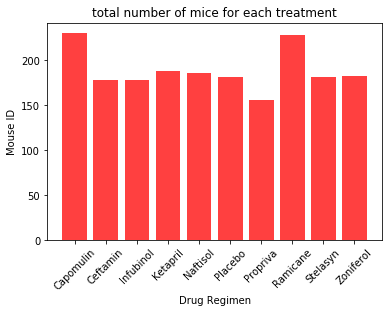

In [7]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

plt.bar(numbermice["Drug Regimen"],numbermice["Mouse ID"],facecolor="red", alpha=0.75, align="center")

plt.title("total number of mice for each treatment")
plt.xlabel('Drug Regimen')
plt.ylabel('Mouse ID')
plt.xticks()
plt.xticks(rotation=45)
plt.show()

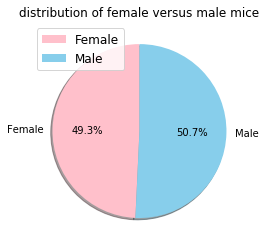

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

numberofgender=clean_mouse_study.groupby(["Sex"])["Mouse ID"].count().reset_index()
numberofgender=numberofgender.set_index("Sex")
colors = ["pink",  "skyblue"]
explode = (0,  0)
numberofgender.plot(y='Mouse ID', kind='pie', explode=explode, colors=colors, legend=False,
                    title= "distribution of female versus male mice",autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis('off')
plt.rcParams['font.size'] = 12
plt.legend(loc="upper left")
plt.show()

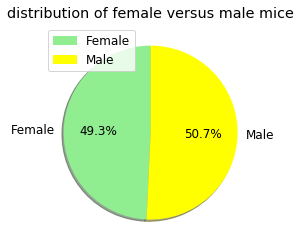

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
numberofgender=clean_mouse_study.groupby(["Sex"])["Mouse ID"].count().reset_index()
gender=numberofgender["Sex"]
num=numberofgender["Mouse ID"]
colors = ["lightgreen",  "yellow"]
explode = (0,  0)
plt.title("distribution of female versus male mice")
plt.pie(num, explode=explode, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.rcParams['font.size'] = 12
plt.legend(loc="upper left")
plt.show()

## Quartiles, Outliers and Boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

fourrj=clean_mouse_study.groupby(["Drug Regimen"])["Timepoint"].max().reset_index()
fourrj= fourrj.loc[(((fourrj["Drug Regimen"]=="Capomulin")|
                               (fourrj["Drug Regimen"]=="Ramicane")|
                               (fourrj["Drug Regimen"]=="Infubinol") |
                               (fourrj["Drug Regimen"]=="Ceftamin"))), : ]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


fourtt1 = pd.merge(clean_mouse_study,fourrj, on =["Drug Regimen","Timepoint"], how="inner" )
fourtt1[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]].head()

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,k403,Ramicane,45,22.050126
1,g791,Ramicane,45,29.128472
2,s508,Ramicane,45,30.276232
3,m546,Ramicane,45,30.564625
4,z578,Ramicane,45,30.638696


In [12]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=fourtt1["Drug Regimen"].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumorvol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers.  
# Locate the rows which contain mice on each drug and get the tumor volumes 
# add subset     
# Determine outliers using upper and lower bounds

for x in treatments:
    Tumor=fourtt1.loc[fourtt1["Drug Regimen"]== x,  : ]
    tumorvol.append(Tumor["Tumor Volume (mm3)"])
    quartiles = Tumor["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print("---------------------- Regimen: ", x ,"--------------------------"  )
    print("-------------------------------------------------------------------")
    print("The lower quartile of", x , "Regimen is:", lowerq)
    print("The upper quartile of", x , "Regimen is:", upperq)
    print("The interquartile range of", x , "Regimen is:", iqr)
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print("Values below", lower_bound, "could be outliers.")
    print("Values above" , upper_bound, "could be outliers.")
    print("The minimum Tumor Volume of the potential outliers is" , Tumor["Tumor Volume (mm3)"].min())
    print("The maximum Tumor Volume of the potential outliers is", Tumor["Tumor Volume (mm3)"].max())
    print("-------------------------------------------------------------------")
    
    

---------------------- Regimen:  Ramicane --------------------------
-------------------------------------------------------------------
The lower quartile of Ramicane Regimen is: 30.981175224999998
The upper quartile of Ramicane Regimen is: 38.508305307499995
The interquartile range of Ramicane Regimen is: 7.527130082499998
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.
The minimum Tumor Volume of the potential outliers is 22.05012627
The maximum Tumor Volume of the potential outliers is 45.22086888
-------------------------------------------------------------------
---------------------- Regimen:  Capomulin --------------------------
-------------------------------------------------------------------
The lower quartile of Capomulin Regimen is: 32.37735684
The upper quartile of Capomulin Regimen is: 40.1592203
The interquartile range of Capomulin Regimen is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values

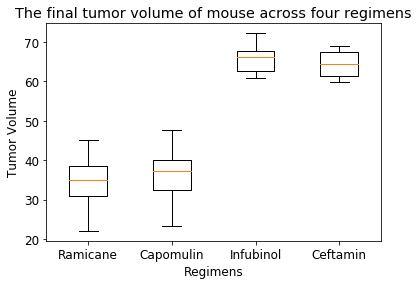

In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title("The final tumor volume of mouse across four regimens")
ax1.boxplot(tumorvol)
plt.xticks([1, 2, 3, 4], ['Ramicane', 'Capomulin', 'Infubinol' ,'Ceftamin'])
plt.xlabel('Regimens')
plt.ylabel('Tumor Volume')
plt.show()

## Line and Scatter Plots

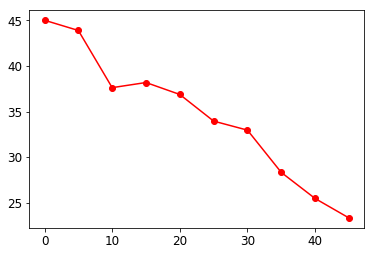

In [14]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

dfcap=clean_mouse_study.loc[(clean_mouse_study["Drug Regimen"]=="Capomulin")&(clean_mouse_study["Mouse ID"]=="s185") , :]
plt.plot(dfcap["Timepoint"],dfcap["Tumor Volume (mm3)"],color='red', marker='o')
plt.show()


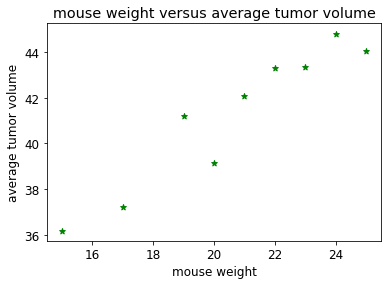

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

wecap=clean_mouse_study.loc[(clean_mouse_study["Drug Regimen"]=="Capomulin"),:]
mwt=wecap.groupby(["Weight (g)"])["Tumor Volume (mm3)"].mean().reset_index()
mwt=mwt.rename(columns = {"Tumor Volume (mm3)":"average tumor volume"})
plt.scatter(mwt["Weight (g)"],mwt["average tumor volume"],marker="*", color="green")
plt.title("mouse weight versus average tumor volume")
plt.xlabel("mouse weight")
plt.ylabel("average tumor volume")

plt.show()

## Correlation and Regression

In [15]:
# Calculate the correlation coefficient 
# for mouse weight and average tumor volume for the Capomulin regimen

wecap=clean_mouse_study.loc[(clean_mouse_study["Drug Regimen"]=="Capomulin"),:]

WeightTumor=wecap.groupby(["Weight (g)"])["Tumor Volume (mm3)"].mean().reset_index()

correlationcoefficient = round(st.pearsonr(WeightTumor["Weight (g)"],WeightTumor["Tumor Volume (mm3)"])[0],2)

print("The correlation coefficient between Weight and average Tumor Volume is ", correlationcoefficient )




The correlation coefficient between Weight and average Tumor Volume is  0.95


The r-squared is: 0.9
linear regression model is: y = 0.89x + 22.76


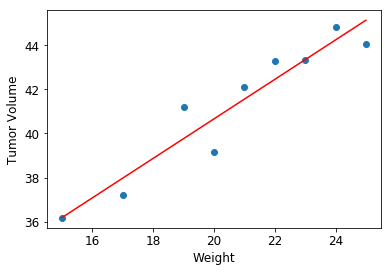

In [20]:
# Calculate the linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = WeightTumor["Weight (g)"]
y_values = WeightTumor["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
rr = round(rvalue**2,2)
print("The r-squared is:",  rr )
print("linear regression model is:",  line_eq )

plt.show()